# Working with images
For analysing image data, we need to open them, apply filters to them, segment objects in the image and do measurements.

See also
* [Lecture notes on scikit image by Emmanuelle Gouillart](https://scipy-lectures.org/packages/scikit-image/index.html)
* [Histograms of images](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html)

## Opening images
Most images read using the [imread](https://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imread) function. In case your image doesn't you should consult the documentation of the given file format.

In [1]:
from skimage.io import imread

image = imread("blobs.tif")

As shown earlier, images are just matrices of intensities. However, showing them as such is not convenient.

In [2]:
image

array([[ 40,  32,  24, ..., 216, 200, 200],
       [ 56,  40,  24, ..., 232, 216, 216],
       [ 64,  48,  24, ..., 240, 232, 232],
       ...,
       [ 72,  80,  80, ...,  48,  48,  48],
       [ 80,  80,  80, ...,  48,  48,  48],
       [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)

As a recap, we can show images using [imshow in scikit image](https://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imshow).

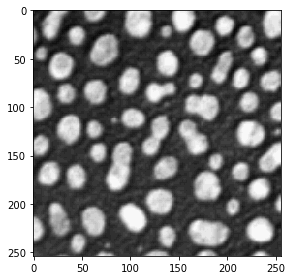

In [3]:
from skimage.io import imshow

imshow(image)

## Lookup tables (a.k.a. color maps)
We can also change the [look-up table](https://matplotlib.org/stable/tutorials/colors/colormaps.html), a.k.a. "color map" for the visualization.

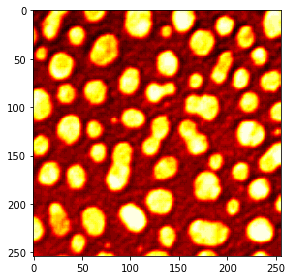

In [5]:
imshow(image, cmap="hot")

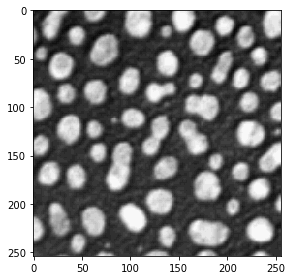

In [6]:
imshow(image, cmap="gray")

## Image statistics
As a recap, we can use [numpy](https://numpy.org/) to determine mean intensity and standard deviation of the image, because it is just a matrix of numbers.

In [7]:
import numpy as np
np.mean(image)

103.26857775590551

In [8]:
np.std(image)

71.05654744558498

The histogram of an image represents its grey value distribution. It tells us if there are bright and dark regions.

In [9]:
number_of_bins = 256
min_max = [0,255]
histogram,bins = np.histogram(image.ravel(),number_of_bins,min_max)

In [10]:
histogram

array([    0,     0,     0,     0,     0,     0,     0,     0,    53,
           0,     0,     0,     0,     0,     0,     0,   304,     0,
           0,     0,     0,     0,     0,     0,  1209,     0,     0,
           0,     0,     0,     0,     0,  3511,     0,     0,     0,
           0,     0,     0,     0,  7731,     0,     0,     0,     0,
           0,     0,     0, 10396,     0,     0,     0,     0,     0,
           0,     0,  7456,     0,     0,     0,     0,     0,     0,
           0,  3829,     0,     0,     0,     0,     0,     0,     0,
        1992,     0,     0,     0,     0,     0,     0,     0,  1394,
           0,     0,     0,     0,     0,     0,     0,  1158,     0,
           0,     0,     0,     0,     0,     0,  1022,     0,     0,
           0,     0,     0,     0,     0,   984,     0,     0,     0,
           0,     0,     0,     0,   902,     0,     0,     0,     0,
           0,     0,     0,   840,     0,     0,     0,     0,     0,
           0,     0,

In [11]:
bins

array([  0.        ,   0.99609375,   1.9921875 ,   2.98828125,
         3.984375  ,   4.98046875,   5.9765625 ,   6.97265625,
         7.96875   ,   8.96484375,   9.9609375 ,  10.95703125,
        11.953125  ,  12.94921875,  13.9453125 ,  14.94140625,
        15.9375    ,  16.93359375,  17.9296875 ,  18.92578125,
        19.921875  ,  20.91796875,  21.9140625 ,  22.91015625,
        23.90625   ,  24.90234375,  25.8984375 ,  26.89453125,
        27.890625  ,  28.88671875,  29.8828125 ,  30.87890625,
        31.875     ,  32.87109375,  33.8671875 ,  34.86328125,
        35.859375  ,  36.85546875,  37.8515625 ,  38.84765625,
        39.84375   ,  40.83984375,  41.8359375 ,  42.83203125,
        43.828125  ,  44.82421875,  45.8203125 ,  46.81640625,
        47.8125    ,  48.80859375,  49.8046875 ,  50.80078125,
        51.796875  ,  52.79296875,  53.7890625 ,  54.78515625,
        55.78125   ,  56.77734375,  57.7734375 ,  58.76953125,
        59.765625  ,  60.76171875,  61.7578125 ,  62.75

Using matplotlibs' [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function, we can visualize the histogram as plot.

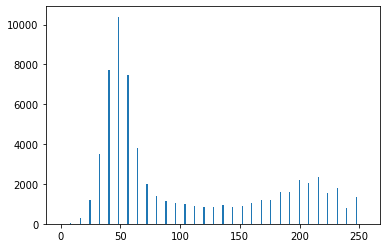

In [12]:
from matplotlib import pyplot as plt

plt.hist(image.ravel(), number_of_bins, min_max)
plt.show()

## Exercise
Open the `banana020.tif` data set, visualize it in a yellowish lookup table side by side with its histogram and measure the minimum and maximum intensity of the image.